### [ 시도별 전출입 인구수 분석 ] <br>
* 데이터 셋:  1970년 ~ 2017년까지 인구이동수
* 대구의 타지역 이동 인구수 분석
* 전국의 인구 이동수에 대한 분석

##### 과정
* 데이터 파일 확인 
                 -> 첫번째 줄 컬럼명이 맞는지 확인<br>
                 -> 불필요한 컬럼이나 행이 있는지 확인
                 -> 결측치 여부/비중 확인
<br>
* 전처리 : 데이터 정리 및 손질
        -> 파일 확인 후 체크한 사항 진행
        -> 결측치 처리
        -> 이상치 처리
        -> 중복데이터 처리
        -> 형변환 ==> 실제 데이터 타입과 일치하도록
        
<br>
* 데이터 가공: 분석하고자 하는 데이터 형태로 
        -> 행인덱스 처리  : 멀티인덱스/컬럼 -> 행인덱스 초기화
        -> 필요한 컬럼 & 행 추출
        -> 추가적인 결측치 / 이상치 / 중복데이터 처리
        -> 형변환 목적에 맞추어 ==> (연속->범주형, 범주형 -> 연속형)

<br>
* 데이터 분석
        -> 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        -> 시각화 및 분석 결과 텍스트 요약 정리

##### [1] 준비과정: 모듈, 데이터

In [51]:
# [1_1] 모듈로딩

import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# [1_2] 데이터 준비
file_path = r'C:\Users\KDP-43\Desktop\KDT_Pandas\과제\DATA\시도별 전출입 인구수.xlsx'

# [1_3] csv-> DF 저장
rawDF = pd.read_excel(file_path, engine='openpyxl')

##### [2] 데이터 확인: 행과 컬럼 수, 실제데이터와 컬럼 타입, 결측치 체크

In [53]:
# [2_1] 기본 정보 확인
# info, describe

# info
#     - 행 개수, 열 개수, 컬럼별 결측치 아닌(non-null) 데이터 개수
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [54]:
# describe() 
# 수치형 데이터 컬럼: 최대값, 최소값, 표준편차, 사분위수, 평균값
# 범주형 데이터 컬럼: 고유값, 최빈값, 최빈값의 빈도수

rawDF.describe( include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [55]:
# [2_3] 실제 데이터 info()에서 확인한 타입과 비교 => head() / tail()
print( rawDF.head() )
print("="*50)
print( rawDF.tail() )

  전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  NaN    NaN  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2  NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3  NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4  NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      2017  
0 

In [56]:
# 기본 정보 확인후 결과
#   - 불필요한 행/컬럼: 0번째 행 삭제
#   - 결측치         : '전출지별' 컬럼 => 이전 행 값으로 채우기 ==> ffill()
#   - 이상치          : 행별로 '-'값이 수치형과 섞여  => '0' 변환 처리 필요

- [3] 데이터 전처리
   * 불필요 데이터 삭제: 0번째 행 삭제
   * 결측치 데이터 처리: '전출지별' 컬럼
   * 이상치 데이터 처리: '-'에 댛 '0' 처리
   * 데이터 자료형 일치: 형변환

In [57]:
# 불필요 데이터 삭제: 0번째 행 삭제
copyDF = rawDF.drop(index=0).copy()
copyDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [58]:
# 결측치 데이터 처리: '전출지별' 컬럼
copyDF.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [59]:
copyDF.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [60]:
type(copyDF.columns[3])

str

In [61]:
# - 결측치 확인된 '1984', '1985', '1986' 컬럼에서 결측치 데이터만 추출

# 모든 3개 열에 대해 결측치가 아니라면 -> sum=0
a = copyDF[['1984', '1985', '1986']].isna()
a[ a.sum(axis=1) > 0]

# copyDF.loc[ copyDF[[1984, 1985, 1986]].isna(), [[1984, 1985, 1986]] ]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [62]:
# 전출지별 칼럼 ffill
copyDF[copyDF.columns[0]].ffill(inplace=True)
copyDF.head(10)

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_12384\3972086737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copyDF[copyDF.columns[0]].ffill(inplace=True)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,전국,울산광역시,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073
10,전국,경기도,452060,533375,418045,542224,579194,1006818,770036,880019,...,2195585,2175681,2168820,2062422,1944962,1895434,1891775,1993080,1958593,1888324


In [63]:
type( copyDF[copyDF.columns[0]] )

pandas.core.series.Series

In [64]:
# '1984', '1985', '1986' 결측치 -> 0 변환
copyDF[ ['1984', '1985', '1986'] ] = copyDF[ ['1984', '1985', '1986'] ].fillna(0).copy()
copyDF[ ['1984', '1985', '1986'] ].isna().sum()

''' 
# other ver.
copyDF.fillna( {0:0}, inplace=True)
# {0:0} -> col:value
'''

' \n# other ver.\ncopyDF.fillna( {0:0}, inplace=True)\n# {0:0} -> col:value\n'

In [65]:
# [3_3] 이상치 데이터 처리
copyDF.replace("-", 0, inplace=True)


C:\Users\KDP-43\AppData\Local\Temp\ipykernel_12384\1763860609.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copyDF.replace("-", 0, inplace=True)


In [66]:
# [3_4] object타입인 48개 칼럼에 대해 모두 int 변환 w/ dict
d_ = dict( zip(copyDF.columns[2:].to_list(), ['int']*(copyDF.shape[1] -2)))
copyDF = copyDF.astype(d_)

'''  
['int']*(copyDF.shape[1] -2)     # 칼럼에서 맨 앞 '전출지별', '전입지별' 제외
'''

##### [4] 데이터 가공
* 대구에서 전지역 전입 인구수 분석
* 전출지별 - '대구광역시'
* 전입지별 - '대구광역시, '전국' 제외

In [ ]:
# 대구광역시 데이터만 추출
mask = ( copyDF['전출지별'] == '대구광역시' )
cityDF = copyDF.loc[mask]
cityDF

In [69]:
# 전출지별 칼럼 삭제
cityDF = cityDF.drop("전출지별", axis=1)

# 전입지별 칼럼 -> 행인덱스
cityDF.set_index('전입지별', inplace=True)

In [70]:
# 대구광역시, 전국 행 삭제
cityDF.drop(['대구광역시', '전국'], inplace=True)

In [73]:
# 가공데이터 확인
print(cityDF.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 서울특별시 to 제주특별자치도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    16 non-null     int32
 1   1971    16 non-null     int32
 2   1972    16 non-null     int32
 3   1973    16 non-null     int32
 4   1974    16 non-null     int32
 5   1975    16 non-null     int32
 6   1976    16 non-null     int32
 7   1977    16 non-null     int32
 8   1978    16 non-null     int32
 9   1979    16 non-null     int32
 10  1980    16 non-null     int32
 11  1981    16 non-null     int32
 12  1982    16 non-null     int32
 13  1983    16 non-null     int32
 14  1984    16 non-null     int32
 15  1985    16 non-null     int32
 16  1986    16 non-null     int32
 17  1987    16 non-null     int32
 18  1988    16 non-null     int32
 19  1989    16 non-null     int32
 20  1990    16 non-null     int32
 21  1991    16 non-null     int32
 22  1992    16 non-null     int32
 23  1993    16 no

##### [5] 분석: 대구에서 전지역 전입 인구수 분석

In [ ]:
# 대구광역시 전입지별 DF 확인
cityDF.head()

In [79]:
# 한글 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

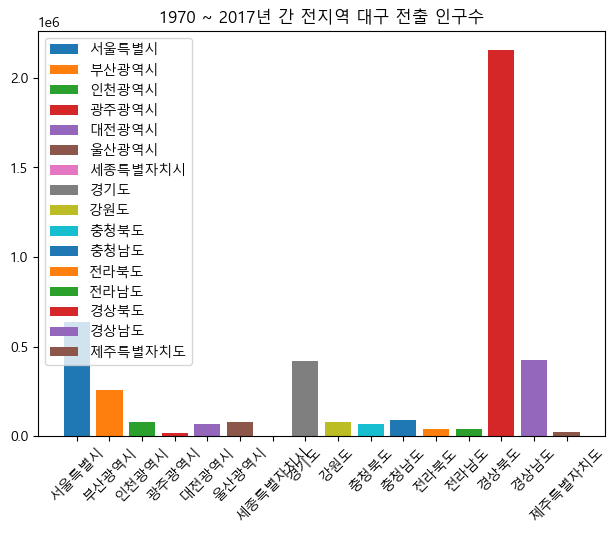

In [ ]:
# 전지역 대구 전출 인구수 plot

for index in cityDF.index:
    
    plt.bar(index,cityDF.loc[index,:].sum(), label=index)

plt.title("1970 ~ 2017년 간 전지역 대구 전출 인구수")
plt.tight_layout()
plt.legend()
# plt.xlim(left=-2, right=len(cityDF.index)+2)
plt.xticks(rotation=45)
plt.show()
          


대구에서 경상북도로 전출한 인구가 지난 1970년부터 2017년간 최다인 것으로 나타남

In [96]:
# 시&도 subplot ver.
megacityDF = cityDF.loc[cityDF.index[:7], :]
normcityDF = cityDF.loc[cityDF.index[7:], :]

In [ ]:
fig = plt.figure( figsize=(10, 8))

fig.subplots()

##### 전국의 인구 이동수에 대한 분석

In [101]:
mask2 = (copyDF["전출지별"] == "전국")

# 전국 DF
all_cityDF = copyDF[mask2]
all_cityDF.iloc[:,0].unique()

array(['전국'], dtype=object)

In [102]:
all_cityDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [ ]:
# 전국에서 각 행정구역으로 전입한 총 인구수

plt

In [ ]:
df2 = pd.DataFrame( [[1,1,pd.NA], [2,pd.NA, 2], [3,3,3]] )
df2

In [ ]:
# 결측치 처리 반영 X Case
a=df2[[1,2]].ffill()
print(a, df2, sep="\n\n")

In [ ]:
# 결측치 처리 반영 O Case
a=df2[[1,2]].ffill()

df2[[1,2]] = a
print(a, df2, sep="\n\n")